In [87]:
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt
def parse_net_xml(filename):
    """
    Parses a SUMO .net.xml file and extracts nodes and links with lengths.
  Args:
      filename: Path to the .net.xml file.

  Returns:
      A dictionary representing nodes and links with lengths.
    """
    nodes={}
    links = []
    tree = ET.parse(filename)
    root = tree.getroot()
    # Extract nodes
    G = nx.DiGraph()
    for node in root.findall('junction'):
        if("_" in node.attrib['id']):
            continue
        node_id = node.attrib['id']
        node_x = float(node.attrib['x'])
        node_y = float(node.attrib['y'])
        node_pos = (node_x,node_y)
        G.add_node(node_id,pos=node_pos)
    
    # Extract edges (links) with lengths skipping all the internal lanes
    for edge in root.findall('edge'):
        if('internal' in str(edge.attrib)):
            continue
        edge_id = edge.attrib['id']
        from_node = edge.attrib['from']
        to_node = edge.attrib['to']
        length = float(edge[0].attrib['length'])
        nx.add_path(G,[from_node,to_node],weight=length)
    return G

In [92]:
def visualize_graph(graph):
    pos = nx.get_node_attributes(graph,'pos')
    edge_labels = nx.get_edge_attributes(graph,'weight')
    plt.figure(1, figsize=(10, 10), dpi=300)
    nx.draw_networkx_nodes(graph,pos,node_size=100,alpha=0.8)
    nx.draw_networkx_edges(graph,pos,width=1,alpha=0.8,edge_color="black")
    nx.draw_networkx_edge_labels(graph,pos=pos,edge_labels=edge_labels)
    plt.savefig("plot.png", dpi=150, bbox_inches="tight")
    plt.show()

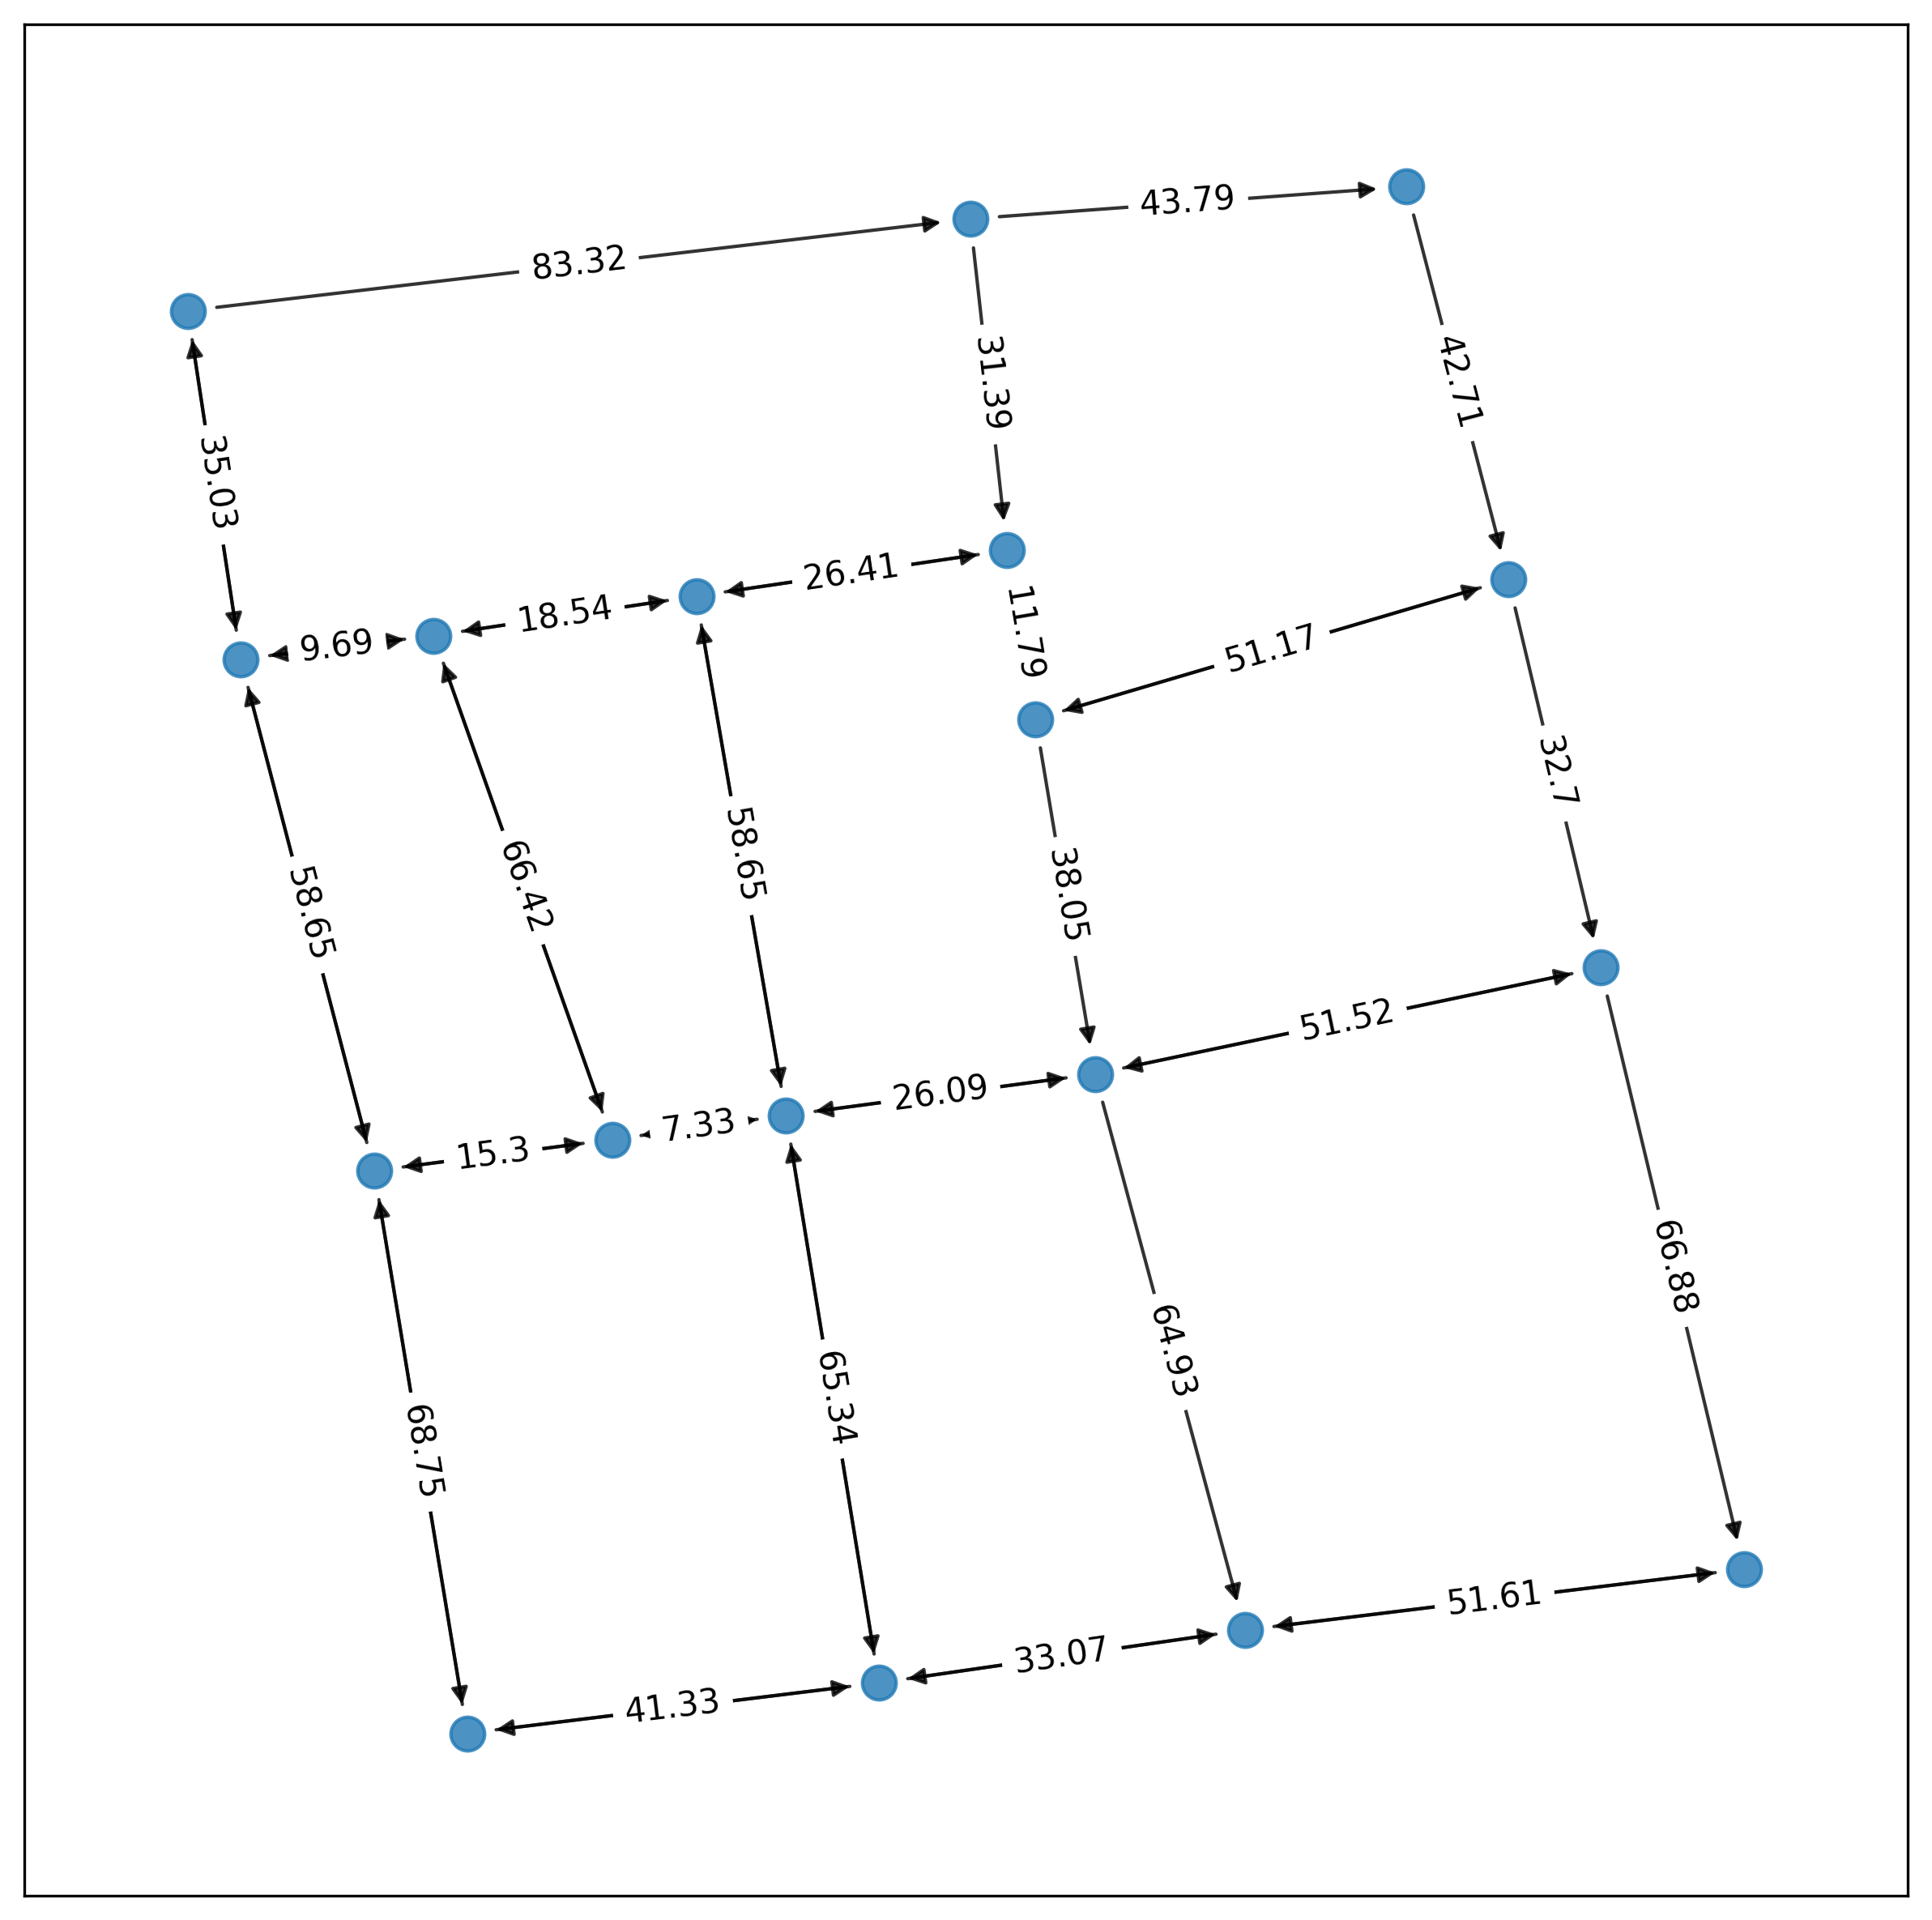

In [93]:
graph = parse_net_xml("osm.net.xml")
visualize_graph(graph)